# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = 'C:\\Users\kelly\Documents\Part01'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:\Users\kelly\Documents\Part01\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
#1
bins = [0, 0.9, 2, 5,max(app_train['CNT_CHILDREN'].values)+1]
app_train['CNT_CHILDREN_GROUP']=pd.cut(app_train['CNT_CHILDREN'].values, bins, include_lowest=True)
app_train.groupby(app_train['CNT_CHILDREN']).size()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
dtype: int64

In [5]:
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.001, 0.9]    215371
(0.9, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 20.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [6]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,"(-0.001, 0.9]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-0.001, 0.9]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-0.001, 0.9]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,"(-0.001, 0.9]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,"(-0.001, 0.9]"


In [7]:
app_train.groupby(['CNT_CHILDREN_GROUP']).size()

CNT_CHILDREN_GROUP
(-0.001, 0.9]    215371
(0.9, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 20.0]          42
dtype: int64

請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot

In [8]:
app_train.groupby(['CNT_CHILDREN_GROUP','TARGET']).size()

CNT_CHILDREN_GROUP  TARGET
(-0.001, 0.9]       0         198762
                    1          16609
(0.9, 2.0]          0          80081
                    1           7787
(2.0, 5.0]          0           3810
                    1            420
(5.0, 20.0]         0             33
                    1              9
dtype: int64

In [9]:
app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL'].agg(max)

CNT_CHILDREN_GROUP  TARGET
(-0.001, 0.9]       0          13500000.0
                    1           1890000.0
(0.9, 2.0]          0          18000090.0
                    1         117000000.0
(2.0, 5.0]          0           2250000.0
                    1           1350000.0
(5.0, 20.0]         0            337500.0
                    1            315000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [10]:
app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL'].agg(lambda x: x.mean())

CNT_CHILDREN_GROUP  TARGET
(-0.001, 0.9]       0         166747.010980
                    1         160804.210548
(0.9, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, 20.0]         0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

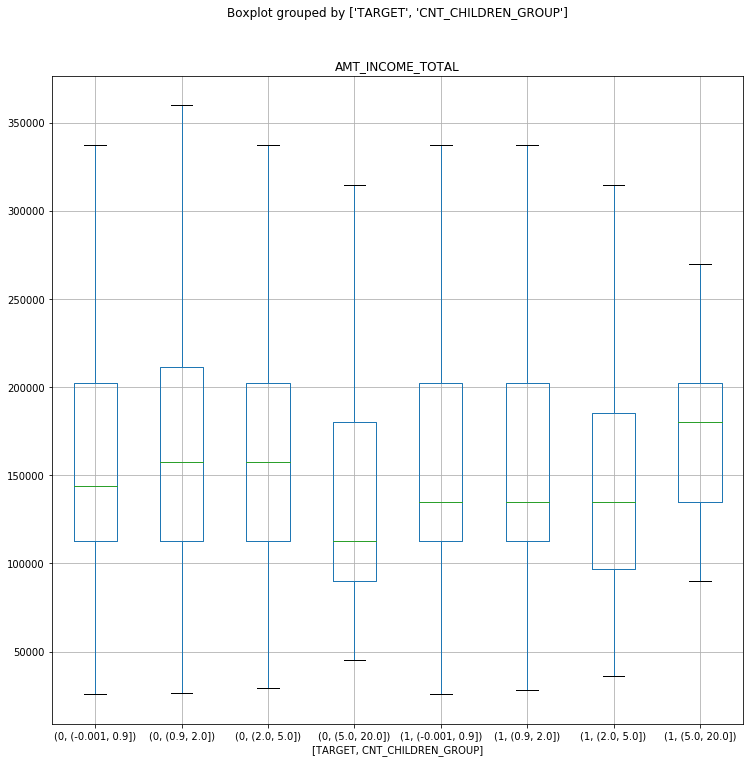

In [13]:

app_train.boxplot(column='AMT_INCOME_TOTAL', by=['TARGET','CNT_CHILDREN_GROUP'],showfliers = False, figsize=(12,12))

請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

In [14]:
import statistics

In [15]:
statistics.stdev(app_train['AMT_INCOME_TOTAL'])

237123.1462788562

In [16]:
app_train.groupby(['CNT_CHILDREN_GROUP','TARGET'])['AMT_INCOME_TOTAL'].apply(lambda x:(x-x.mean())/statistics.stdev(x))

0         0.491521
1         0.972434
2        -0.934706
3        -0.298993
4        -0.426135
5        -0.638040
6        -0.029872
7         1.820052
8        -0.510897
9        -0.298993
10       -0.516569
11       -1.208589
12       -0.934706
13        0.419386
14        0.209578
15       -0.087088
16       -0.553278
17       -0.778636
18       -0.510897
19       -0.703759
20       -0.298993
21        0.232195
22        2.291295
23       -0.786373
24       -0.329378
25       -0.722802
26       -0.569423
27       -0.516569
28        0.972434
29       -0.722802
            ...   
307481    0.756757
307482    0.548625
307483   -0.638040
307484    3.515288
307485    0.793768
307486    0.980959
307487   -0.468516
307488   -0.087088
307489    0.756757
307490   -0.807563
307491   -0.703759
307492    3.939097
307493   -0.298993
307494    0.793768
307495    0.124816
307496    1.820052
307497    0.124816
307498    0.294340
307499   -0.807563
307500    0.887673
307501   -0.833494
307502   -0.